# DSCI 631: Final Project

## Group 23

### Group Members:
- Alireza Hatami – ah3733@drexel.edu
- Krish Balar – kb3842@drexel.edu
- Sanjoli Sogani – ss5656@drexel.edu

# Aircraft Wildlife Strikes and Predicting Damage

### Introduction

This data is provided by the Federal Aviation Administration (FAA); the report file can be either retrieved through FAA's official website (https://wildlife.faa.gov/home) or Kaggle (https://www.kaggle.com/datasets/dianaddx/aircraft-wildlife-strikes-1990-2023). The FAA Wildlife Strike Database has compiled records of reported wildlife strikes since 1990 in North America. According to the FAA, It is important to note that strike reporting is voluntary, which means that the database only contains information from airlines, airports, pilots, and other relevant sources. Bird strikes, which occur when birds collide with aircraft during flight, can pose serious risks to the general public. Not only can they be costly for both airlines and airports alike, but they may also result in legal concerns and liability issues.

The number of wildlife strikes involving aircraft is on the rise in the USA and other countries. From 1990 to 2023, there were approximately 291,600 wildlife strikes involving civil aircraft reported in the United States, with 19,400 of these strikes occurring at 713 airports in 2023. During the same period, U.S. air carriers reported an additional 5,100 strikes at foreign airports, with 236 strikes occurring at 92 airports in 55 countries in 2023. The increase in wildlife strikes can be attributed to the growth in wildlife populations and the increase in the number of air travel.

This project aims to analyze the factors involved in wildlife strikes with aircraft and make a model to predict whether damage will happen to the aircraft.The result can assist the FAA in managing wildlife hazards and risk mitigation in and near airports. Wildlife hazard mitigation such as:
1. Habitat management
2. Wildlife dispersal, removal, and exclusion
3. Detection/prediction of wildlife movements and behavior so that aircraft can avoid high-risk activities, both temporally and spatially
4. New lighting schemes help birds detect and avoid aircraft better, enhancing safety in the airspace.

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
df = pd.read_csv("./data/STRIKE_REPORTS.csv", low_memory=False)

In [54]:
df.head()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288810 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               288810 non-null  int64  
 1   INCIDENT_DATE          288810 non-null  object 
 2   INCIDENT_MONTH         288810 non-null  int64  
 3   INCIDENT_YEAR          288810 non-null  int64  
 4   TIME                   163633 non-null  object 
 5   TIME_OF_DAY            166394 non-null  object 
 6   AIRPORT_ID             288804 non-null  object 
 7   AIRPORT                288810 non-null  object 
 8   LATITUDE               253309 non-null  float64
 9   LONGITUDE              253308 non-null  float64
 10  RUNWAY                 218852 non-null  object 
 11  STATE                  253309 non-null  object 
 12  FAAREGION              253309 non-null  object 
 13  LOCATION               33939 non-null   object 
 14  ENROUTE_STATE          5037 non-nul

The data consists of 100 columns with 288810 different instances accommodating birdstrike incidents between 1990 and 2023. Some key features of the data are:

- INCIDENT_MONTH and INCIDENT_YEAR: They provide the year and month of the incident.
- STATE: States that are involved in the collision with birds.
- SPECIES: various bird species were identified and involved in the incidents reported.
- LATITUDE and LONGITUDE: they provide coordinates of the incident.
- PHASE_OF_FLIGHT: Phase of the flight during which the bird strike occurred.
- DAMAGE_LEVEL: Level of damage caused by bird strikes.
- WEATHER: Weather conditions when the incident happened.
- HEIGHT: The height of the aircraft from the ground where birds collide.   
- SPEED: The speed of the plane when the strike occurred.
- NUM_ENGS: The number of engines that the aircraft has.

We have a large dataset with 37 columns containing Boolean values, 21 columns with numerical values, and 43 columns with categorical variables. However, not all of them are useful for predicting damage. Some of them may not play any role in our model, some may lead to data leakage, and some may provide redundant information. Therefore, we need to explore the data further to determine the numerical and categorical columns that can be utilized in our ML model.

In [56]:
df.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,EMO,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,AOS,BIRD_BAND_NUMBER,NR_INJURIES,NR_FATALITIES
count,2.888100e+05,288810.000000,288810.000000,2.533090e+05,253308.000000,192151.000000,186756.000000,206490.000000,206259.000000,205481.000000,191612.000000,13080.000000,3290.000000,148807.000000,94237.000000,188234.000000,14196.000000,3.900000e+02,276.000000,24.000000
mean,8.736693e+05,7.175974,2011.697798,2.012754e+02,-90.880247,19.755812,8.522377,3.538312,2.013929,2.814956,2.667536,2.900306,2.043161,865.960358,142.585057,0.814466,91.454416,8.811022e+07,1.293478,2.041667
std,2.526448e+05,2.765082,8.432311,8.177522e+04,327.243918,10.724278,12.866405,0.867312,0.420133,2.113806,1.981032,1.950649,1.435114,1843.098801,46.650050,3.547950,661.074472,9.110186e+07,0.756134,1.654484
min,6.082420e+05,1.000000,1990.000000,-3.767333e+01,-177.381000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,6.893202e+05,5.000000,2006.000000,3.298764e+01,-98.469780,10.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000
50%,7.646935e+05,7.000000,2014.000000,3.880581e+01,-87.904460,22.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,0.000000,3.000000,7.897730e+07,1.000000,1.500000
75%,1.064714e+06,9.000000,2019.000000,4.085010e+01,-80.417940,31.000000,10.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000,900.000000,160.000000,0.000000,24.000000,1.893343e+08,1.000000,2.000000
max,1.472259e+06,12.000000,2023.000000,4.115443e+07,164140.000000,92.000000,2301.000000,5.000000,4.000000,7.000000,7.000000,6.000000,5.000000,31300.000000,1250.000000,99.000000,62848.000000,2.821218e+08,7.000000,8.000000


Data description provides some crucial facts about birdstrikes:

According to the table, the average incident month is approximately 7.18, and the standard deviation is approximately 2.77, indicating the spread or dispersion of incident months around the mean. It provides that 50% of the incidents occurred before or in July, and 75% occurred before or in September. 

In addition, the average height is approximately 865.96 feet, and incidents happened with a standard deviation of 1,843, which is quite high. The data indicates that 75% of the incidents occurred at or below a height of 900 feet; however, the maximum height recorded is 31,300 feet, which means the possibility of these incidents is not low even at this height.

Furthermore, the average speed of approximately 142 mph indicates the same average speed that an aircraft has while landing or taking off. Also, 75% of the incidents involve planes with two engines or fewer.



#### Exploring Different Attributes

In this project, we will be analyzing our data set to identify useful attributes for predicting damage. Our target variable is the "INDICATED_DAMAGE" column, which indicates whether damage occurred (True) or not (False).

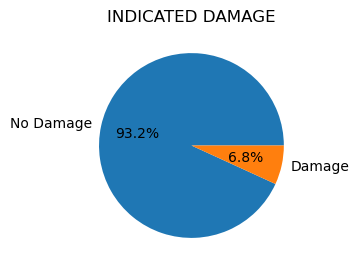

In [57]:
# Vizualizing the percentages of 'No Damage' and 'Damage' in our dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.pie(df['INDICATED_DAMAGE'].value_counts(), labels=['No Damage', 'Damage'], autopct='%1.1f%%')
plt.title('INDICATED DAMAGE')

plt.show()

Before making any changes to the data, we observe that approximately 93 percent of the reported incidents had no damage, while in 6.8 percent of incidents, damage to the aircraft occurred.

Certain features may not be ideal for predicting damage, such as the "AIRCRAFT" feature, which provides the aircraft's model number. In fact, when we explore the categories in this feature, we discover that there are 603 categories, with a significant portion of data classified as UNKNOWN. However, there are other features like "NUM_ENGS" which is more suitable for airplane classification as it provides the plane's the number of engines. Therefore, using "NUM_ENGS" for classification purposes makes more sense than relying on the model numbers.

In [58]:
df["AIRCRAFT"].value_counts()

UNKNOWN                81535
B-737-700              14287
A-320                  13993
B-737-800              11100
CRJ100/200              9503
                       ...  
F-15E                      1
GENERAL AVIA F-22          1
FORD TRIMOTOR              1
BE-T34A                    1
DORNIER ALPHA JET A        1
Name: AIRCRAFT, Length: 603, dtype: int64

According to the FAA, this dataset contains military, commercial, and civil aircraft, which makes identifying and grouping the categories challenging, as certain information about these planes is not accessible to the public.

In [59]:
# Number of engines that the aircraft had
df["NUM_ENGS"].value_counts()

2.0    179682
1.0     13497
3.0      9790
4.0      3290
Name: NUM_ENGS, dtype: int64

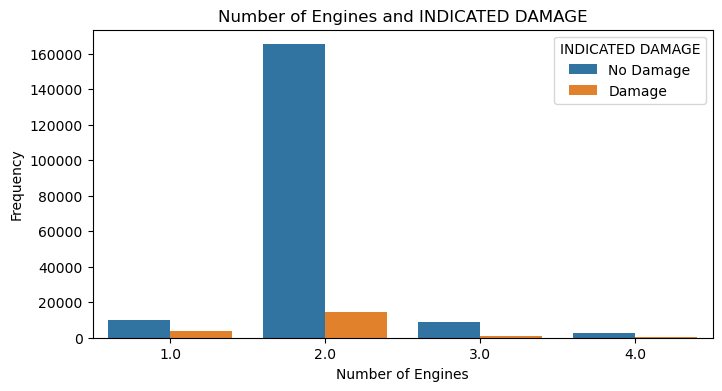

In [60]:
# To visualize the distribution of "damage" and "no damage" cases for planes with different numbers of engines
import matplotlib.pyplot as plt
import seaborn as sns
# we can temporarily change the 'INDICATED_DAMAGE' to string to avoid getting errors 
df['INDICATED_DAMAGE'] = df['INDICATED_DAMAGE'].astype(str)
plt.figure(figsize=(8, 4))
sns.countplot(x='NUM_ENGS', hue='INDICATED_DAMAGE', data=df)
plt.title('Number of Engines and INDICATED DAMAGE')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

According to the bar chart, the majority of planes involved in birdstrike incidents had two engines. This is a reasonable finding, given that most commercial flights are operated using two-engine aircraft.

It is worth noting that the "SPECIES" feature contains over 900 categories, which can sometimes offer repetitive information already found in the "SIZE" column, classifying the bird's size. Therefore, it would be more efficient to retain information about the bird's size for future damage prediction. The FAA should consider grouping these species into broader categories. This approach can help identify the most common bird species involved in strikes and their correlation with certain states in the USA, ultimately assisting in preventing such incidents in the future.

In [61]:
# Birds' Species
df["SPECIES"].value_counts()

Unknown bird - small     48901
Unknown bird - medium    38259
Unknown bird             24839
Mourning dove            14578
Barn swallow              9679
                         ...  
Lilac-crowned parrot         1
Chicken turtle               1
Spectacled caiman            1
Red-necked stint             1
Ravens                       1
Name: SPECIES, Length: 912, dtype: int64

In [62]:
# Categories of Birds' sizes
df["SIZE"].value_counts()

Small     178749
Medium     66543
Large      18246
Name: SIZE, dtype: int64

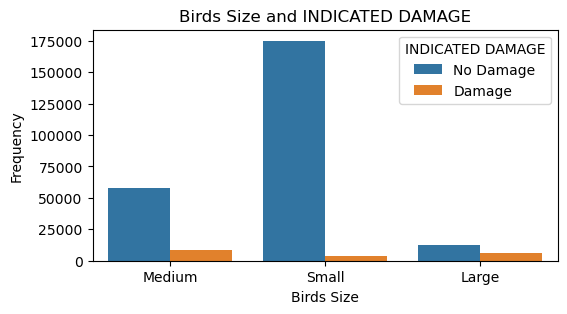

In [63]:
# To visualize the distribution of "damage" and "no damage" cases across different Birds Sizes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.countplot(x='SIZE', hue='INDICATED_DAMAGE', data=df)
plt.title('Birds Size and INDICATED DAMAGE')
plt.xlabel('Birds Size')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

This bar chart illustrates that most bird-plane collisions involve small birds and only a small number of them actually cause damage. Interestingly, the chart also shows that nearly half of the large bird strikes result in plane damage, highlighting the importance of bird size in predicting damage.

A column like "EFFECT" holds vital information to investigate the most common effects of bird strikes on flight management. For instance, in most cases, no action has been taken, indicating no significant impact on the aircraft and perhaps no damage. However, this can create an issue with data leakage. For instance, information such as engine shutdown may only reveal that bird strikes caused some damage to the engine, which can be considered data leakage.

In [64]:
df["EFFECT"].value_counts()

None                                             130096
Precautionary Landing                              7965
Aborted Take-off                                   3041
Other                                              1843
Other, Precautionary Landing                        324
Engine Shutdown                                     241
Engine Shutdown, Precautionary Landing              218
Engine Shutdown, Other, Precautionary Landing        42
Aborted Take-off, Engine Shutdown                    27
Engine Shutdown, Other                               10
Aborted Take-off, Other                               6
None, Precautionary Landing                           1
Name: EFFECT, dtype: int64

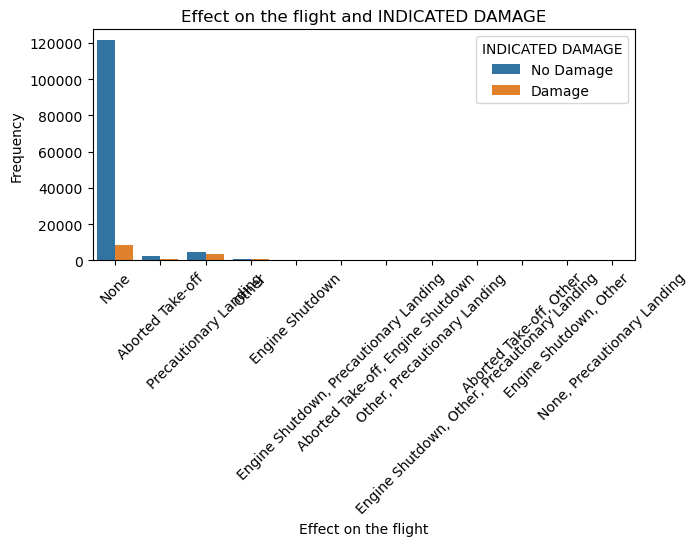

In [65]:
# To visualize the distribution of "damage" and "no damage" cases against the Effect on the flight
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
sns.countplot(x='EFFECT', hue='INDICATED_DAMAGE', data=df)
plt.title('Effect on the flight and INDICATED DAMAGE')
plt.xlabel('Effect on the flight')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])
plt.xticks(rotation=45)
plt.show()

It's worth noting that certain columns, such as "DAMAGE_LEVEL", require pre-processing. According to FAA report, "DAMAGE_LEVEL" has five classifications: None (indicating no damage), M (minor damage), M? (medium damage), S (substantial damage), and D (complete destruction).

In [66]:
df["DAMAGE_LEVEL"].value_counts()

N     167573
M       8578
M?      6821
S       4261
D         82
Name: DAMAGE_LEVEL, dtype: int64

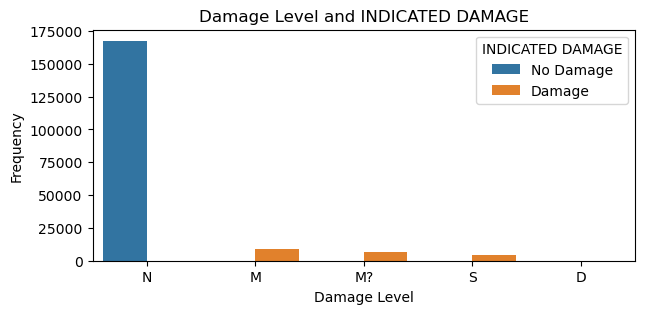

In [67]:
# To visualize the distribution of "damage" and "no damage" cases against the Damage Level
# None (indicating no damage), M (minor damage), M? (medium damage), S (substantial damage), and D (complete destruction)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
sns.countplot(x='DAMAGE_LEVEL', hue='INDICATED_DAMAGE', data=df)
plt.title('Damage Level and INDICATED DAMAGE')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])
plt.show()

Damage level is inappropriate for damage prediction as it already contains information about damage, leading to data leakage.

Additional attributes like "PHASE_OF_FLIGHT," "SKY," and "TIME_OF_DAY" could provide vital insights regarding the timing of bird strikes. Knowing when bird strikes are more prevalent, day or night, can help in taking necessary precautions. Moreover, the sky's state can increase the possibility of bird strikes. Furthermore, identifying the phase of a flight that is more susceptible to bird collisions can be beneficial. The likelihood of damage resulting from a bird strike increases as the frequency of such incidents goes up. Since we are going to keep these features, we will visualize them and investigate their effect on the INDICATED DAMAGE column later on.

In [68]:
# Condition of the sky when the bird strike happened. This feature will be explored and visualized later on.
df["SKY"].value_counts()

No Cloud      67403
Some Cloud    48160
Overcast      23819
Name: SKY, dtype: int64

In [69]:
# Phases of the flight at which the bird strike happened. This feature will be explored and visualized later on.
df["PHASE_OF_FLIGHT"].value_counts()

Approach        75224
Landing Roll    32157
Take-off Run    30248
Climb           26957
En Route         5308
Departure        2933
Descent          2331
Local            1150
Arrival           753
Taxi              667
Parked            115
Name: PHASE_OF_FLIGHT, dtype: int64

In [70]:
# Time of the day when the bird strike happened.
# These features will be visualized and explored further after dropping unsuitable columns.
df["TIME_OF_DAY"].value_counts()

Day      102548
Night     50446
Dusk       7428
Dawn       5972
Name: TIME_OF_DAY, dtype: int64

Now that we've taken a closer look at some of the categorical features, it's time to turn our attention to the numerical ones. We can start by exploring their distribution through visualizations.

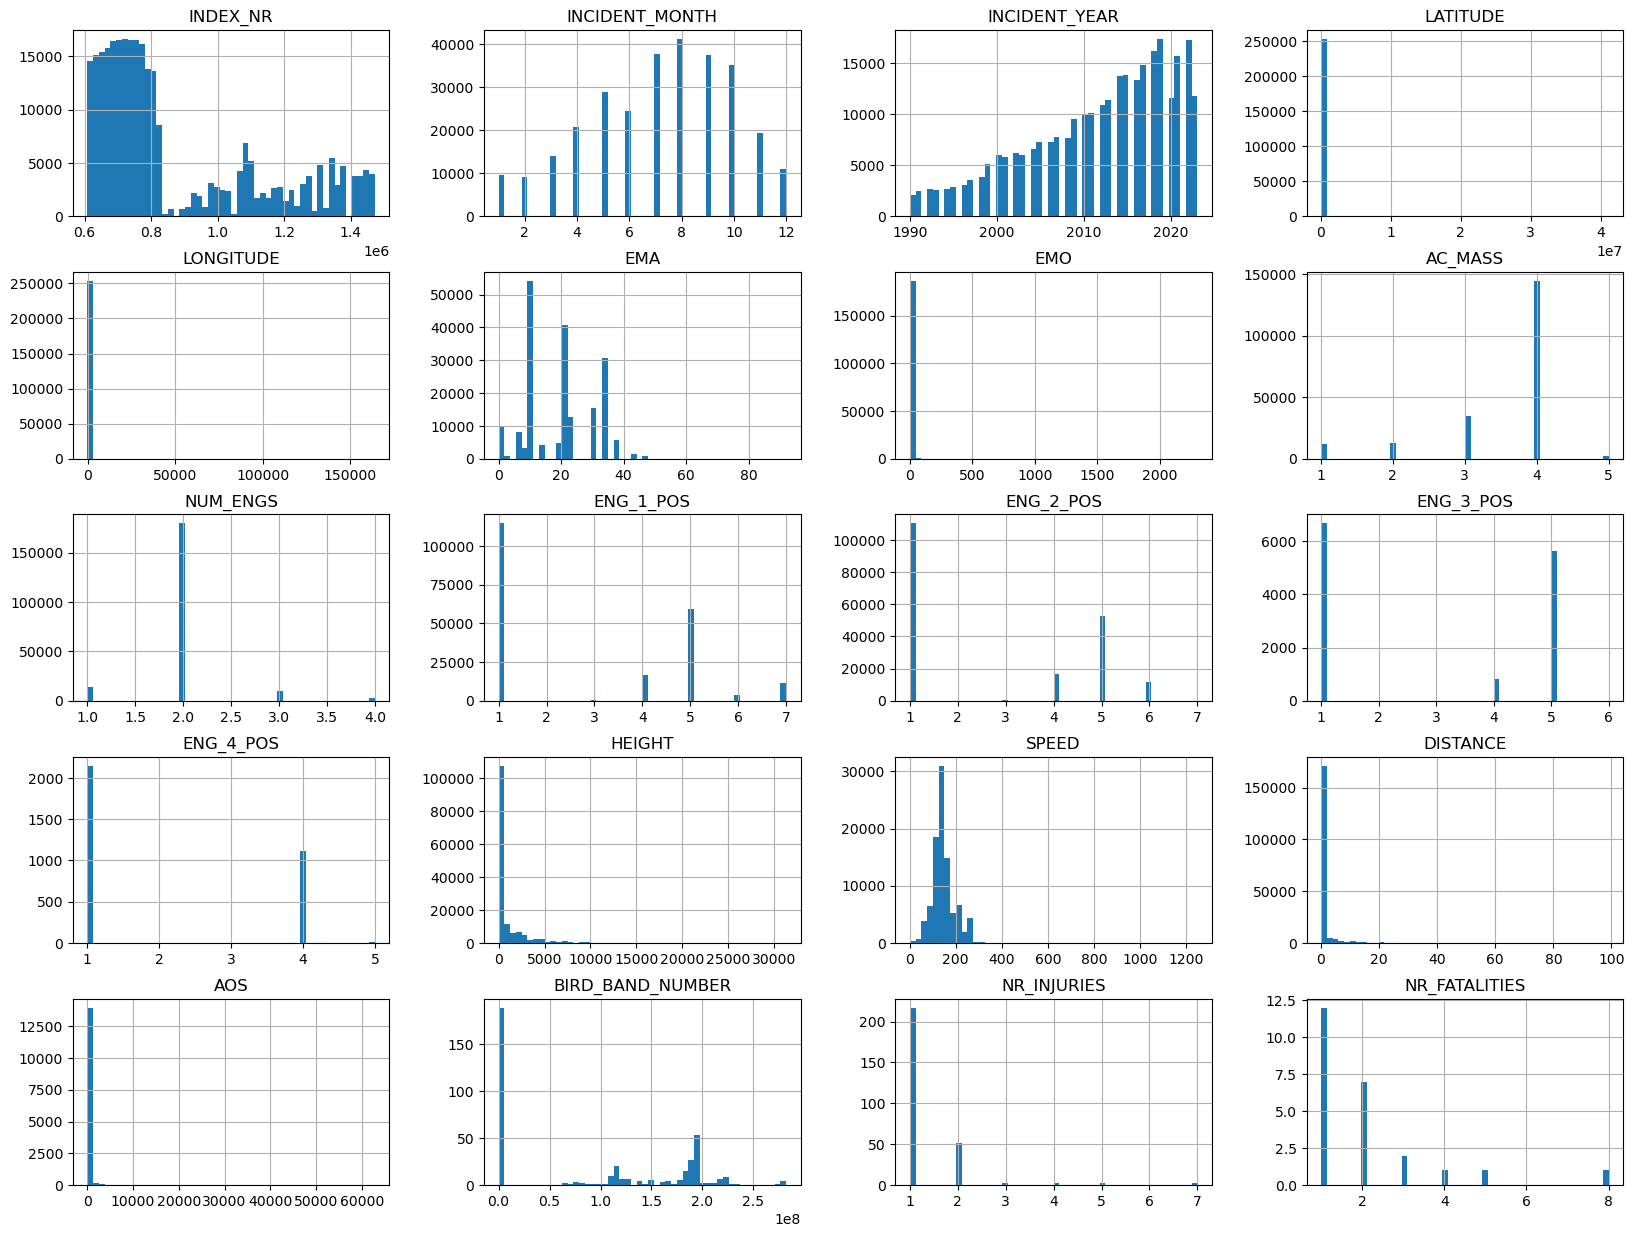

In [71]:
# Visualizing Numerical features before any changes in the dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

According to INCIDENT_YEAR, we can observe that the number of incidents is on the rise, which is consistent with the reported increase in wildlife strikes by the FAA. In addition, the INCIDENT_Month feature illustrates that incidents will likely occur around July, August, and September. The SPEED shows that most incidents happen at speeds between 0 and 400. Surprisingly, bird strikes may still happen even when the airplane is not moving or in the park. This is likely due to the size of the plane. The DISTANCE column, which indicates the distance from the airport, suggests that most incidents happen not far away from the airport. As a result, it is right-skewed. Moreover, the HEIGHT column depicts that most reported birdstrikes included incidents at lower altitudes.

Let's further explore categorical features to determine their relevance for damage prediction.

In [72]:
# Categories of AIRPORT column
df["AIRPORT"].value_counts()

UNKNOWN                                35418
DENVER INTL AIRPORT                     9620
DALLAS/FORT WORTH INTL ARPT             7759
CHICAGO O'HARE INTL ARPT                6239
JOHN F KENNEDY INTL                     5984
                                       ...  
BRIGHAM & WOMEN'S HOSPITAL HELIPORT        1
BANGALORE INTL ARPT                        1
LOGAN COUNTY ARPT                          1
DEMOPOLIS MUNICIPAL ARPT                   1
MONROE COUNTY ARPT                         1
Name: AIRPORT, Length: 2615, dtype: int64

Features such as "AIRPORT" has over 2600 different categories, and the "UNKNOWN" category has more than thirty-five thousand instances.

In [73]:
# Location of incidents reported
df["LOCATION"].value_counts()

FOUND KCLT                           985
FOUND KLGA                           865
FOUND AT KCLT                        710
FOUND AT KLGA                        657
FOUND KDFW                           624
                                    ... 
5 MILES SOUTH E80 ARPT NEW MEXICO      1
FOUND AT MTPP                          1
6 MILES SSW OF PHI ???                 1
TAHLEQUAH                              1
FOUND POSTFLT KHKS                     1
Name: LOCATION, Length: 8906, dtype: int64

There are more than eight thousand location categories where the remaining of the bird was found.

In [74]:
# States that incidents occurred
df["STATE"].value_counts()

TX    24794
FL    20616
CA    20431
NY    14371
CO    12420
      ...  
MB       16
MH       11
NL        6
SK        5
NS        5
Name: STATE, Length: 67, dtype: int64

We can filter out the cases that did not occur in the USA. Out of approximately 288000 data points, more than 240000 are cases reported in the United States of America. Therefore, we are focusing on the cases that occurred in the USA, as it is easier to categorize the states involved in bird strikes. Evidently, Texas, Florida, and California are the top three states that reported the highest birdstrikes.

In [4]:
# List of US state abbreviations and filtering the data frame to valid US states only
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

df = df[df['STATE'].isin(states)]

In [5]:
# This column shows if the airplane was warned or not
df["WARNED"].value_counts()

Unknown    143430
No          53147
Yes         45861
Name: WARNED, dtype: int64

In [6]:
# The Number of birds seen by either the Control Tower or the Airplane Crews
df["NUM_SEEN"].value_counts()

1                51267
2-10             27189
11-100            6670
More than 100      935
Name: NUM_SEEN, dtype: int64

In [7]:
# The number of birds involved in the Strike
df["NUM_STRUCK"].value_counts()

1                212323
2-10              28044
11-100             1430
More than 100        54
Name: NUM_STRUCK, dtype: int64

As features like "NUM_SEEN", "NUM_STRUCK", and "NUM_STRUCK" could potentially help in predicting damage, we will visualize them after removing unsuitable columns and then investigate their impact on damage visually later on.

In [8]:
# We can inspect the data and drop those columns that cause data leakage, redundant information, columns with too many unknown categories
# or contains technical information which requires domain knowledge
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242438 entries, 0 to 288809
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               242438 non-null  int64  
 1   INCIDENT_DATE          242438 non-null  object 
 2   INCIDENT_MONTH         242438 non-null  int64  
 3   INCIDENT_YEAR          242438 non-null  int64  
 4   TIME                   143839 non-null  object 
 5   TIME_OF_DAY            149547 non-null  object 
 6   AIRPORT_ID             242438 non-null  object 
 7   AIRPORT                242438 non-null  object 
 8   LATITUDE               242438 non-null  float64
 9   LONGITUDE              242438 non-null  float64
 10  RUNWAY                 210422 non-null  object 
 11  STATE                  242438 non-null  object 
 12  FAAREGION              242438 non-null  object 
 13  LOCATION               516 non-null     object 
 14  ENROUTE_STATE          7 non-null  

In [9]:
# columns to drop
df_copy = df.copy()
columns_to_drop = [ 'INCIDENT_DATE', 'TIME', 'RUNWAY', 'LOCATION', 'LUPDATE', 'AOS', 'DAMAGE_LEVEL', 'ENROUTE_STATE', 'OPID', 'REG', 'FLT', 'AMA', 'AMO', 'EMA', 'EMO', 'ING_ENG3','SPECIES','AIRPORT_ID','AIRPORT', 'OPERATOR', 'AIRCRAFT', 'DAM_RAD',
                   'AC_CLASS', 'AC_MASS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_WING_ROT',
                   'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3','STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'EFFECT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY', 'EFFECT_OTHER', 'BIRD_BAND_NUMBER', 
                   'REMARKS', 'COMMENTS', 'NR_FATALITIES', 'NR_INJURIES', 'SPECIES_ID', 'DAM_LGHTS', 'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON','TRANSFER', 'TYPE_ENG']
  
df_copy = df_copy.drop(columns=columns_to_drop)

We dropped some features that are not useful for prediction. Some columns provide repetitive information, such as 'INCIDENT_DATE' or 'TIME.' Instead of 'INCIDENT_DATE' or 'TIME,' we use columns like' INCIDENT_YEAR' or' INCIDENT_MONTH' that are easier to process and interpret. Also, instead of TIME, we can use TIME_OF_DAY, which contains the same information.
In summary, we eliminated columns that did not provide valuable insights, could lead to data leakage, or were too technical to be understood by someone without a technical background in aviation. For instance, features like 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', and similar columns provide information about technical parts of the plane, which requires proper domain knowledge to interpret effectively. Other columns like 'REPORTED_NAME,' 'REPORTED_TITLE,' and 'SOURCE' do not provide meaningful information for damage prediction.
Moreover, some features contained hundreds of categories, with most information belonging to unknown classes, complicating our analysis and providing less value to our ML model for damage prediction. As a result, we are left with 23 potentially valuable features that require further exploration to determine the most promising ones for predicting damage. We can take a look at the remaining columns in our dataset:


In [11]:
# The Remaining features that need further exploration
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242438 entries, 0 to 288809
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   INDEX_NR           242438 non-null  int64  
 1   INCIDENT_MONTH     242438 non-null  int64  
 2   INCIDENT_YEAR      242438 non-null  int64  
 3   TIME_OF_DAY        149547 non-null  object 
 4   LATITUDE           242438 non-null  float64
 5   LONGITUDE          242438 non-null  float64
 6   STATE              242438 non-null  object 
 7   FAAREGION          242438 non-null  object 
 8   NUM_ENGS           161551 non-null  float64
 9   PHASE_OF_FLIGHT    162296 non-null  object 
 10  HEIGHT             135790 non-null  float64
 11  SPEED              84334 non-null   float64
 12  DISTANCE           181144 non-null  float64
 13  SKY                124870 non-null  object 
 14  PRECIPITATION      119868 non-null  object 
 15  INGESTED_OTHER     242438 non-null  bool   
 16  IN

It is evident that a considerable amount of data is missing for each of the features. Moreover, the missing values for these predictors are distinct from each other, and some can't be filled since there's a significant absence of data, which, in some cases, exceeds 100000 cases. For example, PHASE_OF_FLIGHT, a crucial feature in our model building, has more than 100 thousand missing data. Another instance is SPEED, a likely important feature, with only around half of the data available while the remaining half represents null values. Considering the situation, the ideal approach would be to remove the rows with missing values and analyze how much data remains.

In [12]:
# Dropping rows with null values
df_copy.dropna(inplace=True)

In [13]:
# To check the remaining amount of data after removing null values
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33041 entries, 5 to 288804
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX_NR           33041 non-null  int64  
 1   INCIDENT_MONTH     33041 non-null  int64  
 2   INCIDENT_YEAR      33041 non-null  int64  
 3   TIME_OF_DAY        33041 non-null  object 
 4   LATITUDE           33041 non-null  float64
 5   LONGITUDE          33041 non-null  float64
 6   STATE              33041 non-null  object 
 7   FAAREGION          33041 non-null  object 
 8   NUM_ENGS           33041 non-null  float64
 9   PHASE_OF_FLIGHT    33041 non-null  object 
 10  HEIGHT             33041 non-null  float64
 11  SPEED              33041 non-null  float64
 12  DISTANCE           33041 non-null  float64
 13  SKY                33041 non-null  object 
 14  PRECIPITATION      33041 non-null  object 
 15  INGESTED_OTHER     33041 non-null  bool   
 16  INDICATED_DAMAGE   33

We have dropped the null values, and now we have over 30000 instances that can be used for further analysis. Before that, let's encode the target variable with 1 for damage and 0 for no damage. This will help us in building our model later in the project. We can also perform a correlation analysis between INDICATED_DAMAGE and other numerical features to identify the most influential factors in predicting the damage to the aircraft.

In [14]:
# Inspecting the categories of target variable
damage_counts = df_copy['INDICATED_DAMAGE'].value_counts()
print(damage_counts)

False    29581
True      3460
Name: INDICATED_DAMAGE, dtype: int64


In [15]:
# Converting the boolean values of 'INDICATED_DAMAGE' column and other features with boolean values to zeros and ones: True to 1, False to 0
df_copy.dropna(inplace=True)
columns_to_convert = ['INDICATED_DAMAGE','REMAINS_SENT', 'INGESTED_OTHER', 'STR_RAD', 'REMAINS_COLLECTED'] 

for col in columns_to_convert:
    df_copy[col] = df_copy[col].astype(int)

In [16]:
# Rechecking our Target variable to make sure the 0 and 1 match the labels' distribution
damage_counts = df_copy['INDICATED_DAMAGE'].value_counts()
print(damage_counts)

0    29581
1     3460
Name: INDICATED_DAMAGE, dtype: int64


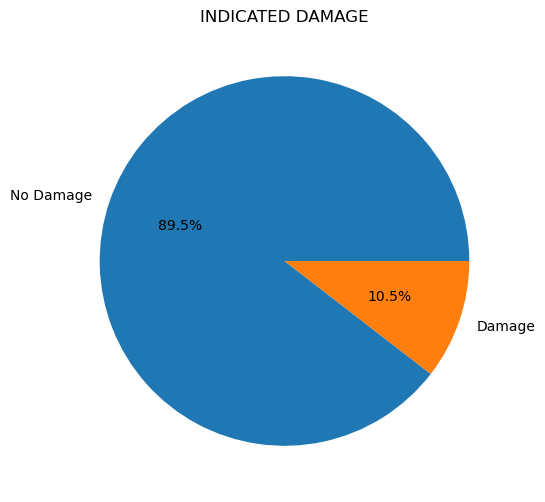

In [17]:
# Vizualizing the percentages of 'No Damage' and 'Damage' in our dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(df_copy['INDICATED_DAMAGE'].value_counts(), labels=['No Damage', 'Damage'], autopct='%1.1f%%')
plt.title('INDICATED DAMAGE')

plt.show()

It appears that only approximately 10% of the cases caused damage to the plane, while the vast majority, about 89%, did not cause any harm. This indicates an imbalance in our target variable.

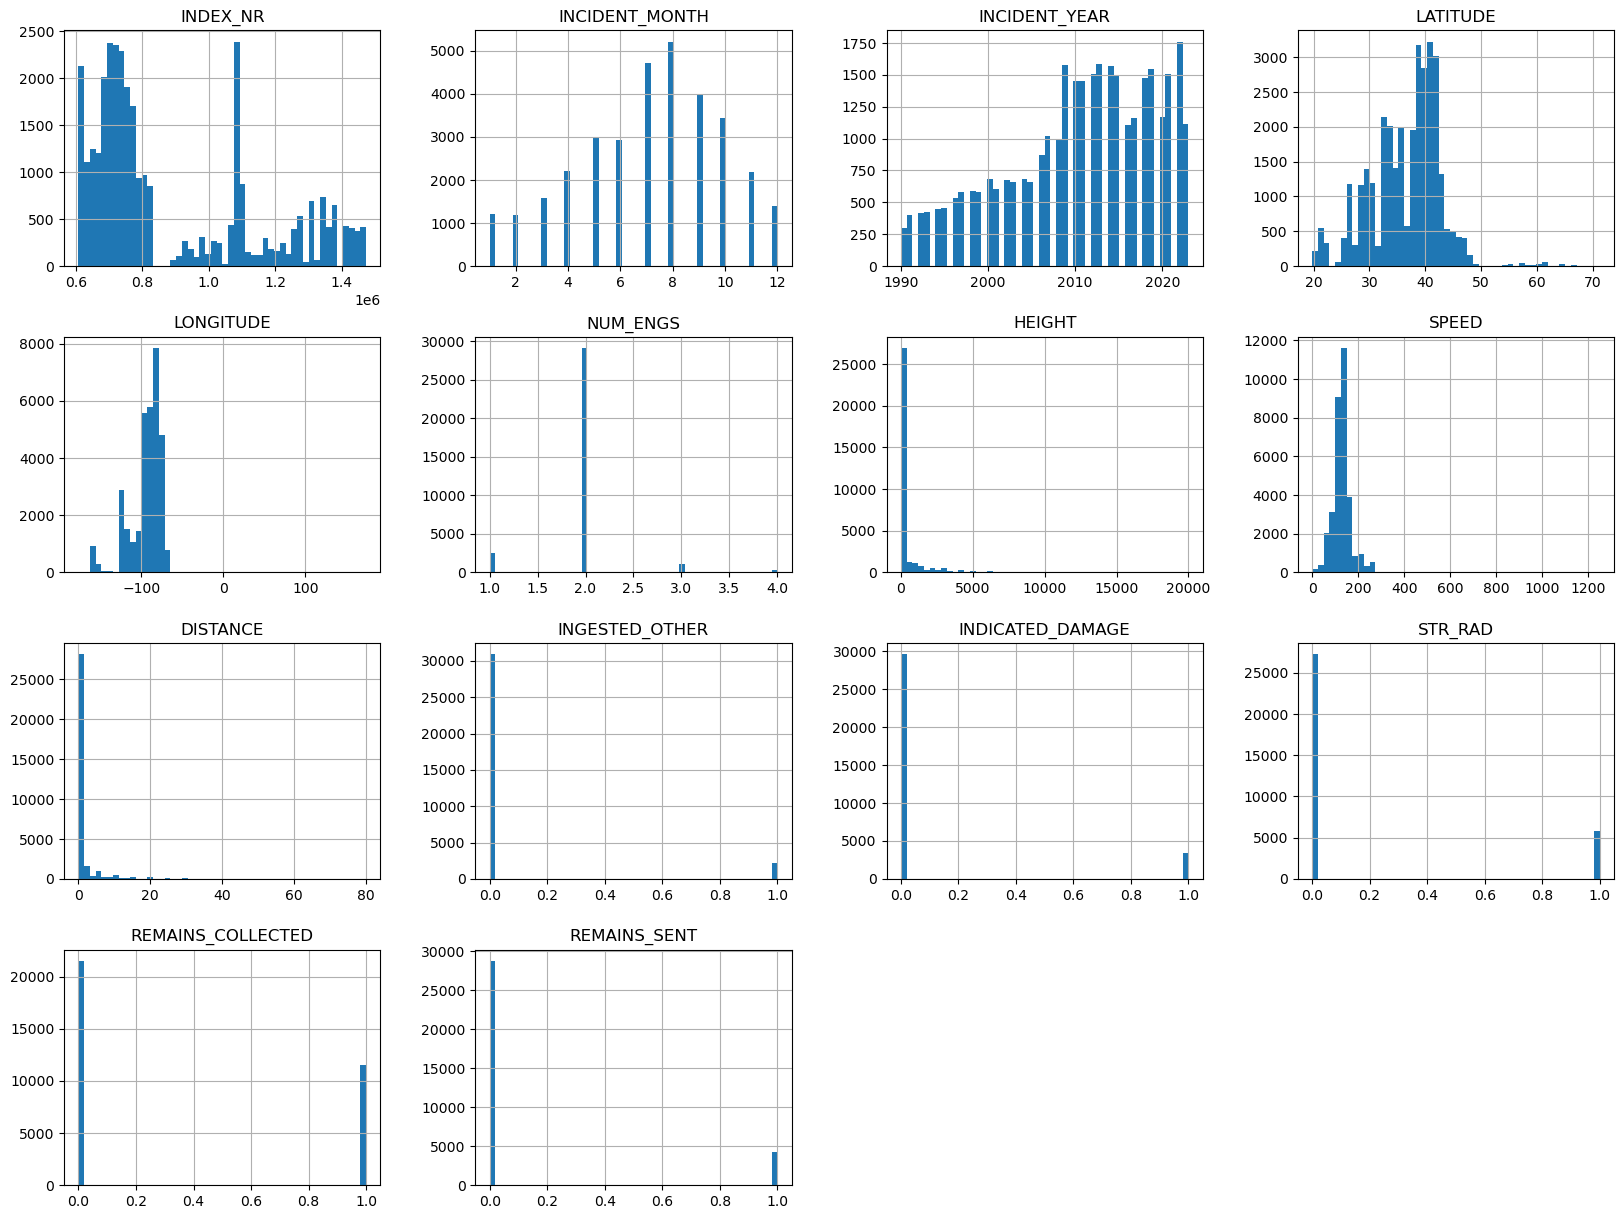

In [91]:
# Visualizing Numerical features after we dropped the null values from our dataset
import matplotlib.pyplot as plt
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

Based on the distribution of each numerical feature in our data, it is clear that July and August are the months with the highest number of reported incidents. Additionally, the number of birdstrike incidents has been increasing since 1990 according to the INCIDENT_YEAR distribution. This could be due to the fact that air travel is increasing each year, leading to a rise in the number of incidents. It could also be a sign that wildlife is growing, especially birds, in the area.

It's worth noting that most airplane incidents occur in planes with two engines, which is understandable since they are more common. Additionally, the height and distance from the airport where these incidents happen tend to skew towards the right and need to be addressed later in the model building. The SPEED column distribution also reveals that most incidents occur at speeds between 0 and 200 mph, indicating that they occur during the early or final stages of the flight since the average speed of the plane goes as high as 600  mph, according to the FAA.

### Correlations Analysis


We can use Correlation analysis to measure the relationship between the numerical variables in our dataset and find which features help to predict the Damage.

In [92]:
corr_matrix = df_copy.corr()
corr_matrix['INDICATED_DAMAGE'].sort_values(ascending=False)

C:\Users\alire\AppData\Local\Temp\ipykernel_11400\3871210789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


INDICATED_DAMAGE     1.000000
INGESTED_OTHER       0.274557
REMAINS_SENT         0.095808
HEIGHT               0.088276
DISTANCE             0.085283
LATITUDE             0.052400
REMAINS_COLLECTED    0.032015
INDEX_NR             0.026518
LONGITUDE            0.022722
SPEED                0.007550
INCIDENT_MONTH      -0.014659
INCIDENT_YEAR       -0.046277
STR_RAD             -0.047096
NUM_ENGS            -0.090888
Name: INDICATED_DAMAGE, dtype: float64

Overall, the correlation analysis shows a weak correlation between features and "INDICATED_DAMAGE"; however, among these features, we can observe that "INGESTED_OTHER" "DAM_RAD", "HEIGHT" and "DISTANCE" are positively correlated with damage and have higher correlation coefficients followed by other features such as "LATITUDE", "LONGITUDE" and "SPEED" which are positively correlated with INDICATED_DAMAGE.  Additionally, features such as "NUM_ENGS" and "INCIDENT_YEAR" are negatively correlated with "INDICATED_DAMAGE." Also, features like "LONGITUDE" and "LATITUDE" have a very weak linear correlation with "INDICATED_DAMAGE."

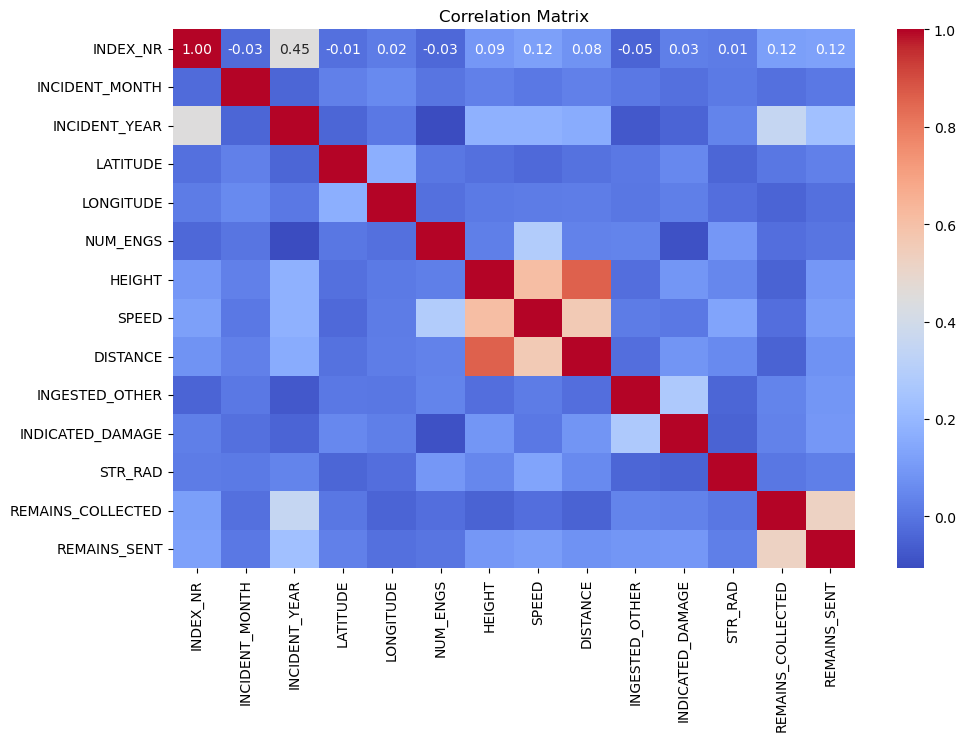

In [93]:
# Heatmaps can help us to gain insights from the correlation between numerical variables in our dataset
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_copy.corr(numeric_only=True)
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Exploring Categorical Features

To find useful categorical variables, we can visualize these categorical features in df_copy and explore their distribution, considering whether damage is caused or not.

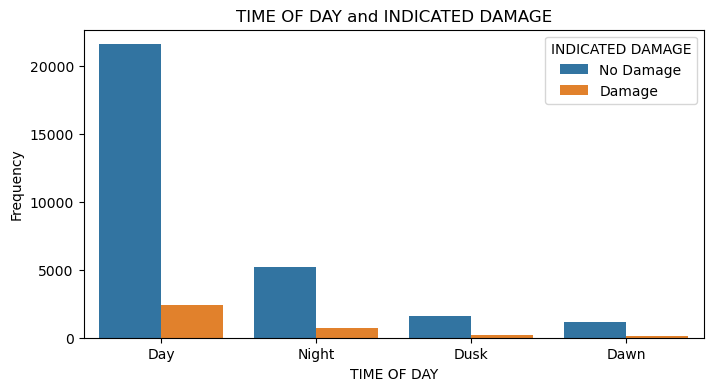

In [94]:
# To visualize the distribution of "damage" and "no damage" cases across different times of the day
import matplotlib.pyplot as plt
import seaborn as sns
# we can temporarily change the 'INDICATED_DAMAGE' to string to avoid getting errors 
df_copy['INDICATED_DAMAGE'] = df_copy['INDICATED_DAMAGE'].astype(str)
plt.figure(figsize=(8, 4))
sns.countplot(x='TIME_OF_DAY', hue='INDICATED_DAMAGE', data=df_copy)
plt.title('TIME OF DAY and INDICATED DAMAGE')
plt.xlabel('TIME OF DAY')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

Most birdstrike reports occur during the daytime, followed by incidents that happen at night, dusk, and dawn. This is because many bird species fly during the day. The graph shows that the number of damaged planes during the day is much less than the number of planes with no damage. Although the highest number of incidents occurred during the day, there is a much smaller gap between damaged and undamaged planes at night. This indicates that among the incidents that occurred at night, a larger number of planes were damaged. This might be because it is more difficult for birds to spot planes during the night.

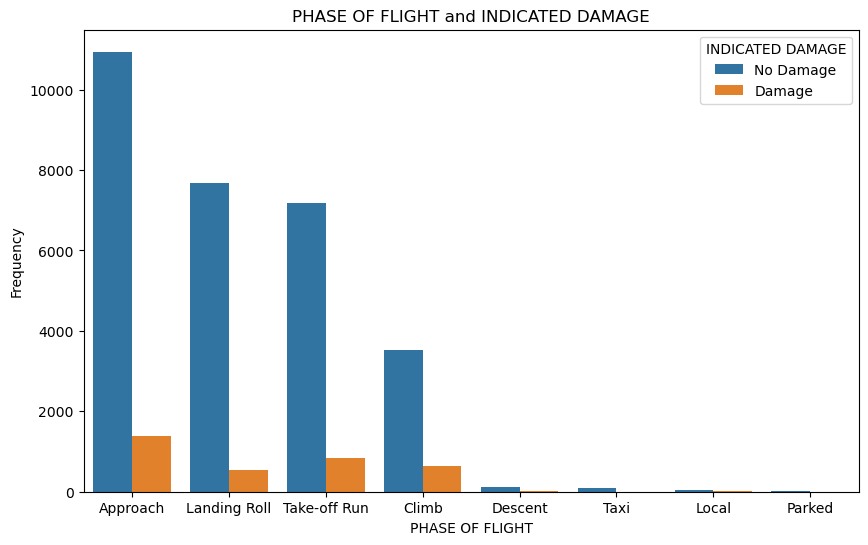

In [95]:
# To visualize the distribution of "damage" and "no damage" cases across different phases of the flight
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='PHASE_OF_FLIGHT', hue='INDICATED_DAMAGE', data=df_copy, order=df_copy['PHASE_OF_FLIGHT'].value_counts().index)
plt.title('PHASE OF FLIGHT and INDICATED DAMAGE')
plt.xlabel('PHASE OF FLIGHT')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

The chart provided ranks birdstrikes based on the total number of incidents, revealing that Approach, Take-off Run, Landing Roll, and Climb are the stages of flight with the highest occurrence of such incidents. This indicates that the risk of bird strikes is greater at the beginning and end of flights. While there is a significant difference between the number of birdstrikes resulting in damage and those not resulting in damage, the gap is most pronounced in the first four categories. However, the difference in the number of birdstrikes resulting in damage during Approach, Take-Off Run, Landing Roll, and Climb is not as high.

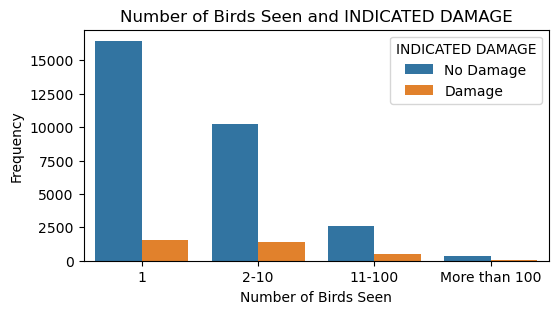

In [96]:
# To visualize the distribution of "damage" and "no damage" cases across different Number of Birds Seen
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.countplot(x='NUM_SEEN', hue='INDICATED_DAMAGE', data=df_copy)
plt.title('Number of Birds Seen and INDICATED DAMAGE')
plt.xlabel('Number of Birds Seen')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

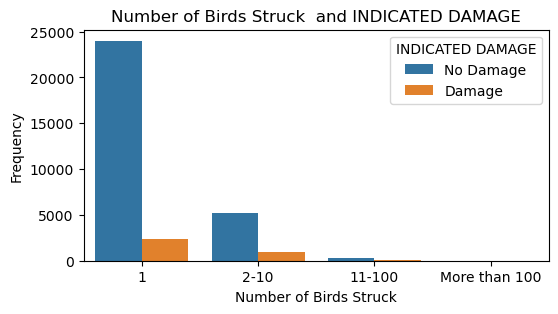

In [97]:
# To visualize the distribution of "damage" and "no damage" cases across different Number of Birds Struck
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.countplot(x='NUM_STRUCK', hue='INDICATED_DAMAGE', data=df_copy)
plt.title('Number of Birds Struck  and INDICATED DAMAGE')
plt.xlabel('Number of Birds Struck')
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

The two graphs displayed above indicate that bird strikes generally involve a small number of birds, usually less than 10. This could be the reason why most of the collisions did not result in any damage. However, the chart showing the "Number of Birds Seen" reveals that there were instances where a significant number of birds collided with the aircraft.

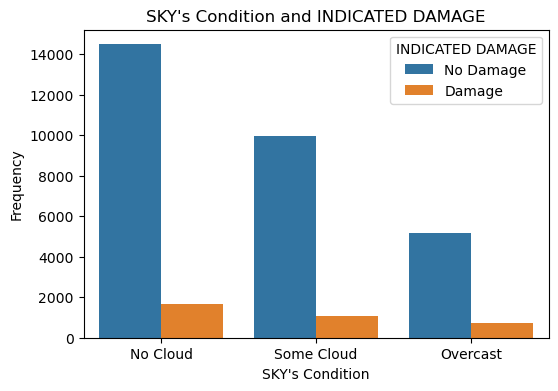

In [98]:
# To visualize the distribution of "damage" and "no damage" cases across different Conditions of sky
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='SKY', hue='INDICATED_DAMAGE', data=df_copy, order=df_copy['SKY'].value_counts().index)
plt.title("SKY's Condition and INDICATED DAMAGE")
plt.xlabel("SKY's Condition")
plt.ylabel('Frequency')
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

It is interesting to note that the majority of bird strikes occur when there are clear skies, followed by some clouds and overcast conditions where the entire sky is covered with clouds. However, a higher proportion of incidents that happen during cloudy conditions result in damage, highlighting the importance of visibility in bird strike cases. Furthermore, there are fewer cloudy days than days with transparent or partially cloudy skies.

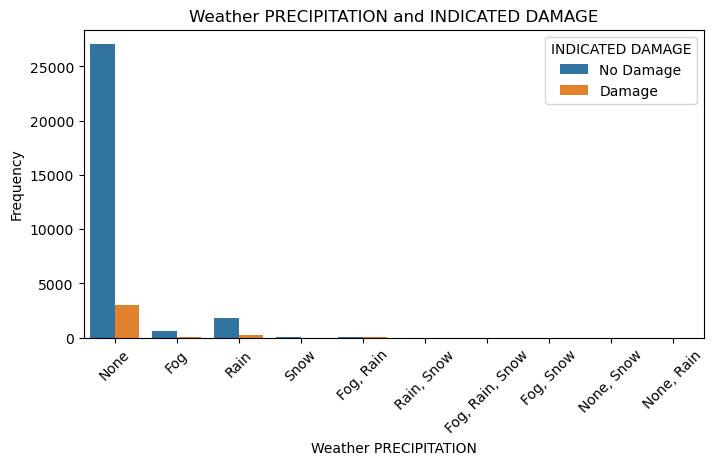

In [99]:
# To visualize the distribution of "damage" and "no damage" cases across different Precipitation of weather
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='PRECIPITATION', hue='INDICATED_DAMAGE', data=df_copy)
plt.title("Weather PRECIPITATION and INDICATED DAMAGE")
plt.xlabel("Weather PRECIPITATION")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='INDICATED DAMAGE', labels=['No Damage', 'Damage'])

plt.show()

We have noticed that the majority of the cases where there was either no damage or some damage occurred, belonged to the "None" category. This implies that weather precipitation does not have a significant impact on damage for such incidents. Therefore, we can eliminate this column from our model as it does not offer any valuable contribution.

In [19]:
df_clean = df_copy.copy()

The features identifieds  are the most helpful for damage prediction; therefore, they will be implemented for further analysis. Additionally, we need to convert categorical variables into numerical ones through techniques like one-hot encoding to make them compatible with machine learning algorithms.

After noticing that our machine learning model wasn't performing well, we attempted some feature engineering. We went back to before the data preparation stage and tried some feature engineering, like using Numpy to convert continuous features like 'Height' into a number of bins. However, these changes didn't improve the performance, and we found that there wasn't much of a difference in the results. As a result, we decided to stick with the original features in our dataset.

In [20]:
# df_clean['HEIGHT'] = pd.cut(df_clean['HEIGHT'], bins=6, labels=False)
# df_clean['SPEED'] = pd.cut(df_clean['SPEED'], bins=5, labels=False)
# df_clean = df_clean.drop(columns=['HEIGHT','SPEED'])

In [21]:
# df_clean['summer'] = df_clean['INCIDENT_MONTH'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
# df_clean['winter'] = df_clean['INCIDENT_MONTH'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
# df_clean = df_clean.drop(columns=['INCIDENT_MONTH'])

### Data Preparation for Machine Learning Algorithms

In [22]:
# Checking Target Variable categories
df_clean['INDICATED_DAMAGE'].value_counts()

0    29581
1     3460
Name: INDICATED_DAMAGE, dtype: int64

The distribution of 'INDICATED_DAMAGE' shows that the target variable is unbalanced, where the class labeled 0 (no damage) has more samples than the class labeled 1 (damage).

Now, it is time to prepare our data for Machine Learning algorithms. First, we prepare our train and test data:

In [23]:
# Now, we split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['INDICATED_DAMAGE'])
y = df_clean['INDICATED_DAMAGE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In order to create our pipeline, it is important to ensure that our data's numerical and categorical features are appropriately separated. This separation will allow us to apply the pipeline to each feature type.

In [24]:
# Remove the categorical attribute from train data 
X_train_num = X_train.drop(["TIME_OF_DAY", "PHASE_OF_FLIGHT","NUM_SEEN", "NUM_STRUCK", "SIZE", "SKY",'STATE','PRECIPITATION','FAAREGION','WARNED'], axis=1)

In [25]:
# Remove the categorical attribute from test data
X_test_num = X_test.drop(["TIME_OF_DAY", "PHASE_OF_FLIGHT","NUM_SEEN", "NUM_STRUCK", "SIZE", "SKY",'STATE','PRECIPITATION','FAAREGION','WARNED'], axis=1)

In [26]:
# Building a pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler()),
])

# We defined our numerical and categorical attributes here
num_attribs = list(X_train_num)
cat_attribs = ["TIME_OF_DAY", "PHASE_OF_FLIGHT","NUM_SEEN", "NUM_STRUCK", "SIZE", "SKY",'STATE','PRECIPITATION','FAAREGION','WARNED']

# Pipeline for categorical features
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Now, we Apply fit_transform() to our train data: 
data_prepared = full_pipeline.fit_transform(X_train)

# Since we want to evaluate performance on test data as well, we need to apply the .transform() for test data:
test_data_prepared = full_pipeline.transform(X_test)

In [27]:
data_prepared

<26432x111 sparse matrix of type '<class 'numpy.float64'>'
	with 607936 stored elements in Compressed Sparse Row format>

In [28]:
test_data_prepared

<6609x111 sparse matrix of type '<class 'numpy.float64'>'
	with 152007 stored elements in Compressed Sparse Row format>

In [29]:
full_pipeline.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('min_max_scaler',
                                                  MinMaxScaler()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['INDEX_NR', 'INCIDENT_MONTH', 'INCIDENT_YEAR',
                                  'LATITUDE', 'LONGITUDE', 'NUM_ENGS', 'HEIGHT',
                                  'SPEED', 'DISTANCE', 'INGESTED_OTHER',
                                  'STR_RAD', 'REMAINS_COLLECTED',
                                  'REMAINS_SENT']),
                                ('cat', OneHotEncoder(),
                                 ['TIME_OF_DAY', 'PHASE_OF_FLIGHT', 'NUM_SEEN',
                                  'NUM_STRUCK', 'SIZE', 'SKY', 'STATE',
                                  'PRECIPITATION', 'FAAREGION', 'WARNED

In [30]:
print("Shape of train data_prepared before applying SMOTE:", data_prepared.shape)

Shape of train data_prepared before applying SMOTE: (26432, 111)


In [31]:
print("Shape of train labels before applying SMOTE:", y_train.shape)

Shape of train labels before applying SMOTE: (26432,)


### SMOTE

Now we can apply SMOTE to our Train set and Test set to add synthetic interpolated data to smaller class:

In [32]:
# Applying SMOTE to Train Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
data_prepared_resampled, y_train_resampled = smote.fit_resample(data_prepared, y_train)

In [33]:
print("Shape of train data_prepared after applying SMOTE:", data_prepared_resampled.shape)

Shape of train data_prepared after applying SMOTE: (47328, 111)


In [34]:
print("Shape of train labels after applying SMOTE:", y_train_resampled.shape)

Shape of train labels after applying SMOTE: (47328,)


### Machine Learning Models

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

logR = LogisticRegression(max_iter=1000)
logR.fit(data_prepared_resampled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [105]:
# Predict on the training set and evaluates the model's performance with Precision, Recall, F1-score
y_train_pred = logR.predict(data_prepared_resampled)

precision_train = precision_score(y_train_resampled, y_train_pred)
recall_train = recall_score(y_train_resampled, y_train_pred)
f1_train = f1_score(y_train_resampled, y_train_pred)

print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1-score:", f1_train)

Training Precision: 0.8241676834582534
Training Recall: 0.7992308992562542
Training F1-score: 0.8115077662404531


In [106]:
# Evaluating the model's performance on Test Data
y_pred = logR.predict(test_data_prepared)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.3483217226092464
Recall: 0.7947976878612717
F1 Score: 0.484368119771026


The logistic regression model performs well on the training data but significantly drops in performance on the test data, particularly in precision. However, we can observe that the recall on test data is almost 80 percent, indicating that the model is good at identifying all positive instances. This indicates that our model might be overfitting the training data. We can try to address this issue by tuning hyperparameters.

In [107]:
# Using GridSearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
lg_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

grid_search = GridSearchCV(logistic_regression, lg_grid, cv=10, scoring='accuracy')
grid_search.fit(data_prepared_resampled, y_train_resampled)
best_logistic_regression = grid_search.best_estimator_
y_pred = best_logistic_regression.predict(test_data_prepared)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision: 0.34790874524714827
Recall: 0.7933526011560693
F1-score: 0.48370044052863437


Even after tuning the hyperparameters, the results did not change much. To improve our damage prediction model, we plan to implement more robust models such as Random Forest and explore ensemble methods like voting classifiers.

#### Random Forest

Now, let's try another model like Random Forest:

In [38]:
# First, we can try Random Forest without Hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

rnd_clf = RandomForestClassifier()

# Training the model
rnd_clf.fit(data_prepared_resampled, y_train_resampled)

# Evaluating performance on test data
y_pred_test_rf = rnd_clf.predict(test_data_prepared)

precision_test_rf = precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
# please consider that after running the model a couple of times, results may change a bit. Hence, the report may have a slightly different result
print("\nTesting Precision for Random Forest:", precision_test_rf)
print("Testing Recall for Random Forest:", recall_test_rf)
print("Testing F1 Score for Random Forest:", f1_test_rf)


Testing Precision for Random Forest: 0.6026785714285714
Testing Recall for Random Forest: 0.3901734104046243
Testing F1 Score for Random Forest: 0.47368421052631576


We can see that the precision has increased compared to logistic regression. Now, we are going to perform hyperparameter tuning to see if we can improve our model even further:

In [108]:
# Hyperparameter Tuning for logistic Regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

rnd_clf = RandomForestClassifier()
# 'n_estimators': [200, 300, 400, 500],'max_samples': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]
rf_grid = {'n_estimators': [500], 'max_leaf_nodes': [16]}

rf_grid_search = GridSearchCV(rnd_clf, rf_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(data_prepared_resampled, y_train_resampled)
rf_best_estimate = rf_grid_search.best_estimator_

y_pred_rf = rf_best_estimate.predict(test_data_prepared)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Precision for Random Forest:", precision_rf)
print("Recall for Random Forest:", recall_rf)
print("F1 Score for Random Forest :", f1_rf)

Best Parameters for Random Forest: {'max_leaf_nodes': 16, 'n_estimators': 500}
Precision for Random Forest: 0.39373970345963755
Recall for Random Forest: 0.6907514450867052
F1 Score for Random Forest : 0.5015739769150053


We can observe that the precision decreased from 58 to approximately 39 percent, while the recall increased from 40.60 to almost 70 percent. Additionally, the F1 score increased by roughly 2 percent. Due to limited computational power, we had to use a grid search with fewer parameters, which did not allow for a more elaborate investigation. As a result, we have lower estimations of precision compared to results without hyperparameter tuning.

#### SVM

We also can try SVM with hyperparameter tuning:

In [40]:
# withouth Hyperparameter Tuning
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

svm_clf = SVC()

# Training the model
svm_clf.fit(data_prepared_resampled, y_train_resampled)

# Evaluating performance on test data
y_pred_test_svm = svm_clf.predict(test_data_prepared)

precision_test_svm = precision_score(y_test, y_pred_test_svm)
recall_test_svm = recall_score(y_test, y_pred_test_svm)
f1_test_svm = f1_score(y_test, y_pred_test_svm)

print("\nTest Precision:", precision_test_svm)
print("Test Recall:", recall_test_svm)
print("Test F1 Score:", f1_test_svm)


Test Precision: 0.4595744680851064
Test Recall: 0.6242774566473989
Test F1 Score: 0.5294117647058824


The SVC model demonstrates higher precision compared to previous models; however, the recall drops to 62 percent. Overall, the model's performance is still not desirable; hence, we can consider hyperparameter tuning for the SVM model.

Now we can try hyperparameter tuning to see if it enhances the model's performance.

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

svm = SVC()
svm_gird = {'C': [1],'kernel': ['poly'],'gamma': [1], 'degree': [1],  'coef0': [1] }
# {'C': [0.1, 1, 10, 100],'kernel': ['rbf', 'poly'],'gamma': [0.1, 1, 10], 'degree': [2, 3, 4],  'coef0': [1, 0.1] }
svm_grid_search= GridSearchCV(svm, svm_gird, cv=5, scoring='accuracy', return_train_score=True)

svm_grid_search.fit(data_prepared_resampled, y_train_resampled)

svm_best_estimate = svm_grid_search.best_estimator_

y_pred_svm = svm_best_estimate.predict(test_data_prepared)

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Best Parameters of SVM:", svm_grid_search.best_params_)
print("Precision of SVM:", precision_svm)
print("Recall of SVM:", recall_svm)
print("F1 Score of SVM:", f1_svm)

Best Parameters of SVM: {'C': 1, 'coef0': 1, 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
Precision of SVM: 0.3057630736392743
Recall of SVM: 0.8280346820809249
F1 Score of SVM: 0.4466095089633671


As we attempted to add various parameters and search for the best pairs, we realized that it was taking too long and had no results. Consequently, we had to use fewer conditions in the grid search. However, based on the parameters extracted through hyperparameter tuning of the SVM model, we can observe a decrease in precision, while recall increased to over 80 percent.

#### Neural Network

After trying Logistic Regression, SVM, and Random Forest, we can try the MLP Classifier, as it can capture the complexities in our dataset:

In [46]:
# MLP Classifier without Hyperparameter Tuning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

mlp = MLPClassifier(max_iter=1000)

# Training
mlp.fit(data_prepared_resampled, y_train_resampled)

# Evaluating performance on test data
y_pred_test_mlp = mlp.predict(test_data_prepared)

precision_test_mlp = precision_score(y_test, y_pred_test_mlp)
recall_test_mlp = recall_score(y_test, y_pred_test_mlp)
f1_test_mlp = f1_score(y_test, y_pred_test_mlp)
# Please consider that the results may change slightly after running the model a couple of times. Hence, the report may have a slightly different result
print("\nTesting Precision of Neural Network:", precision_test_mlp)
print("Testing Recall of Neural Network:", recall_test_mlp)
print("Testing F1 Score of Neural Network:", f1_test_mlp)


Testing Precision of Neural Network: 0.40182054616384916
Testing Recall of Neural Network: 0.44653179190751446
Testing F1 Score of Neural Network: 0.42299794661190965


According to the result, the model is overfitting for the training set; however, the precision drops for the training set to around 40 percent, and the recall drops to approximately 44 percent. Now, we are going to apply hyperparameter tuning to see if we can increase the performance of the model:

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

mlp = MLPClassifier(max_iter=1000)
# {'hidden_layer_sizes': [(10,), (100,), (10, 10)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01, 1.0],'learning_rate': ['constant', 'adaptive']}
mlp_grid = {'hidden_layer_sizes': [(10,)],'activation': ['relu'],'solver': ['adam'], 'alpha': [0.0001],'learning_rate': ['constant']}

mlp_grid_search = GridSearchCV(mlp, mlp_grid, cv=5, scoring='accuracy')

mlp_grid_search.fit(data_prepared_resampled, y_train_resampled)
mlp_best_estimate = mlp_grid_search.best_estimator_

y_pred_mlp = mlp_best_estimate.predict(test_data_prepared)

precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("Best Parameters of Neural Network:", mlp_grid_search.best_params_)
print("Precision of Neural Network:", precision_mlp)
print("Recall of Neural Network:", recall_mlp)
print("F1 Score of Neural Network:", f1_mlp)

Best Parameters of Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}
Precision of Neural Network: 0.36941176470588233
Recall of Neural Network: 0.680635838150289
F1 Score of Neural Network: 0.47890188103711234


The performance on simple grid_search depicts a slight decrease in precision compared to previous models. The reason can be explained as follows: when using a single layer with a small number of neurons, the model may not be able to effectively capture the complexities and including more parameters in the grid search requires considerable computational power.

#### Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),('svc', svm_clf)], voting='hard')

# We can use the Voting Classifier on the best parameters (results of hyperparameter tuning) for the best models that we tried
# Earlier to improve their performance by accessing rf_best_estimator, svm_best_estimator, mlp_best_estimator  
# It was initially our idea to use them for voting classifiers; however, the training time was very long,
# and with our system's limited computational power, it was not possible to accomplish this task.
# VotingClassifier(estimators=[('random_forest', rf_best_estimate),('svm', svm_best_estimate),('neural_network', mlp_best_estimate)],voting='hard')

voting_clf.fit(data_prepared_resampled, y_train_resampled)
y_pred_voting = voting_clf.predict(test_data_prepared)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

print("Precision of Voting Classifier:", precision_voting)
print("Recall of Voting Classifier:", recall_voting)
print("F1 Score of Voting Classifier :", f1_voting)

Precision of Voting Classifier: 0.474025974025974
Recall of Voting Classifier: 0.6329479768786127
F1 Score of Voting Classifier : 0.5420792079207921


It appears that there has been a considerable increase in precision compared to previous models when they were used separately. This indicates that implementing a voting classifier can be highly effective. The results also show that the F1 score has increased, while the Recall has slightly decreased compared to using the Logistic Regression model alone.

We were mainly limited by computing power and our inability to conduct a thorough grid search for hyperparameter tuning. This could be the reason why some models exhibited lower precision after hyperparameter tuning. At times, we waited for almost a whole day and still did not receive any output. Consequently, we had to restrict the grid search to certain parameters solely for the purpose of the project.